### Business Objective : To evaluvate the Forest Fire might be in secure Location 
### Business Constraints : To check that park Weather , Might take time consuming

### To resolve this issue by creating a model which reduce there time by 70% - 80%


In [ ]:
# Data description: 

#   This Dataset contains 5 rows and 30 columns

#      FFMC - Fine fuel moisture code, 
#      DMC - Duff Moisture Code, 
#      DC - Drought Code,
#      ISI - Initial Spread Index,
#      RH - Relative Humidity

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
data = pd.read_csv(r"C:\Users\Shashi\Model Building\Neural Network\fireforests.csv")

In [21]:
# Checking the head of data

data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
# Checking the duplicates

data.duplicated().sum()

8

In [23]:
data = data.drop_duplicates()

In [24]:
data.duplicated().sum()

0

In [25]:
# Checking the Missing Values

data.isna().sum()

month       0
day         0
FFMC        0
DMC         0
DC          0
ISI         0
temp        0
RH          0
wind        0
rain        0
area        0
dayfri      0
daymon      0
daysat      0
daysun      0
daythu      0
daytue      0
daywed      0
monthapr    0
monthaug    0
monthdec    0
monthfeb    0
monthjan    0
monthjul    0
monthjun    0
monthmar    0
monthmay    0
monthnov    0
monthoct    0
monthsep    0
dtype: int64

In [26]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# droping the data

data = data.drop(['month', 'day'], axis = 1)

In [28]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Standardization - Scaler Min = 0, MAx = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [30]:
data_norm = norm_fun(data)
data = pd.DataFrame(data_norm)
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.927975,0.376071,0.633151,0.160848,0.535866,0.344158,0.401266,0.003193,0.011911,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,0.071684,0.219863,0.291071,0.081731,0.187816,0.192532,0.200103,0.046291,0.058793,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.210889,0.504046,0.114082,0.424437,0.200000,0.255556,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,0.000559,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.957419,0.483115,0.827958,0.196078,0.662379,0.447059,0.500000,0.000000,0.006032,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Spliting the data

X = data.iloc[:,0:8]
Y = data.iloc[:,8]

In [34]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000
...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000


In [35]:
Y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    0.005904
513    0.049769
514    0.010231
515    0.000000
516    0.000000
Name: area, Length: 509, dtype: float64

In [36]:
# Spliting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [37]:
X.shape

(509, 8)

In [38]:
Y.shape

(509,)

In [39]:
len(X.columns)

8

In [59]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu',input_dim = 8))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10
28/28 [==============================] - 3s 24ms/step - loss: 0.7208 - accuracy: 0.1434 - val_loss: 0.6561 - val_accuracy: 0.3481
Epoch 2/10
28/28 [==============================] - 0s 10ms/step - loss: 0.6124 - accuracy: 0.3787 - val_loss: 0.5454 - val_accuracy: 0.4296
Epoch 3/10
28/28 [==============================] - 0s 9ms/step - loss: 0.4965 - accuracy: 0.4632 - val_loss: 0.4272 - val_accuracy: 0.4667
Epoch 4/10
28/28 [==============================] - 0s 11ms/step - loss: 0.3829 - accuracy: 0.4669 - val_loss: 0.3229 - val_accuracy: 0.4667
Epoch 5/10
28/28 [==============================] - 0s 11ms/step - loss: 0.2867 - accuracy: 0.4669 - val_loss: 0.2406 - val_accuracy: 0.4667
Epoch 6/10
28/28 [==============================] - 0s 9ms/step - loss: 0.2134 - accuracy: 0.4669 - val_loss: 0.1809 - val_accuracy: 0.4667
Epoch 7/10
28/28 [==============================] - 0s 8ms/step - loss: 0.1617 - accuracy: 0.4669 - val_loss: 0.1400 - val_accuracy: 0.4667
Epoch 8/10
28/28

In [60]:
# List all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


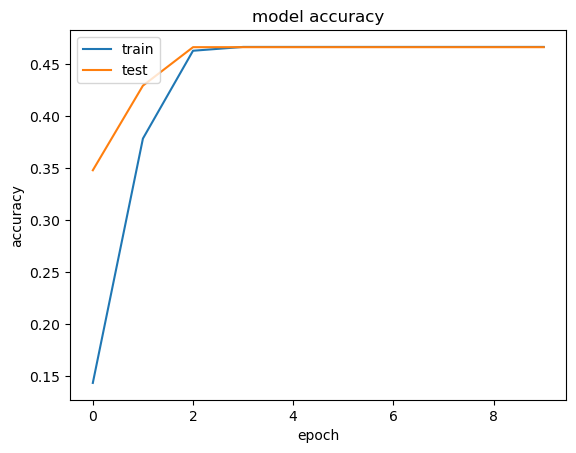

In [61]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

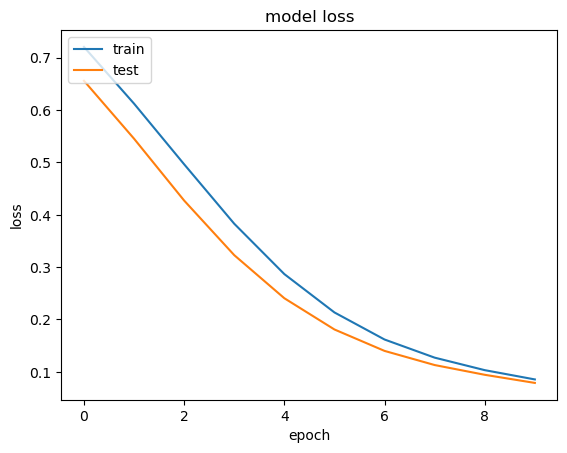

In [62]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show(block=True)

In [63]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_test = (y_test > 0.5).astype(int)

4/4 [==============================] - 0s 4ms/step


In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,   0],
       [  2,   0]], dtype=int64)

In [65]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [66]:
score

0.9803921568627451